## Basic Data Manipulation

In [2]:
# Import package
import pandas as pd 
import numpy as np
import os
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
# Set up directory
dir_data = 'C:\\Users\\victo\\Dropbox\\AI_M\\data_p1'

f_app = os.path.join(dir_data, 'application_train.csv')
print('Path of read in data: %s' % (f_app))
app_train = pd.read_csv(f_app)
app_train.head()

Path of read in data: C:\Users\victo\Dropbox\AI_M\data_p1\application_train.csv


SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

              ...              FLAG_DOCUMENT_18 FLAG_DOCUMENT_19  \
0             ...                             0                0   
1             ...                             0                0   
2             ...                             0                0   
3             ...                             0                0   
4             ...                             0                0   

  FLAG_DOCUMENT_20 FLAG_DOCUMENT_21 AMT_REQ_CREDIT_BUREAU_HOUR  \
0                0                0                        0.0   
1                0                0                        0.0   
2                0                0                        0.0   
3                0                0                        NaN   
4                0                0                        0.0   

  AMT_REQ_CREDIT_BUREAU_DAY  AMT_REQ_CREDIT_BUREAU_WEEK  \
0                       0.0                         0.0   
1                       0.0                         0.0   
2                       0.0                         0.0   
3                       NaN                         NaN   
4                       0.0                         0.0   

   AMT_REQ_CREDIT_BUREAU_MON  AMT_REQ_CREDIT_BUREAU_QRT  \
0                        0.0                        0.0   
1                        0.0                        0.0   
2                        0.0                        0.0   
3                        NaN                        NaN   
4                        0.0                        0.0   

   AMT_REQ_CREDIT_BUREAU_YEAR  
0                         1.0  
1                         0.0  
2                         0.0  
3                         NaN  
4                         0.0  

[5 rows x 122 columns]

#### Split "CNT_CHILDREN" into Four Groups and Assign to New Column "CNT_CHILDREN_GROUP"

In [21]:
chd = app_train['CNT_CHILDREN'].values
cut_rule = [0, 1, 2, 3, 5]
group_names = ['No Kids', '1~2 Kids', '3~5 Kids', 'More Than 5 Kids']

app_train['CNT_CHILDREN_GROUP'] = pd.cut(app_train['CNT_CHILDREN'].values, cut_rule, include_lowest = True, labels = group_names)
app_train['CNT_CHILDREN_GROUP'].value_counts()
app_train['CNT_CHILDREN_GROUP'].head()

0    No Kids
1    No Kids
2    No Kids
3    No Kids
4    No Kids
Name: CNT_CHILDREN_GROUP, dtype: category
Categories (4, object): [No Kids < 1~2 Kids < 3~5 Kids < More Than 5 Kids]

#### Group Data by "CNT_CHILDREN_GROUP", "Target" Columns and Sort by Average "AMT_INCOME_TOTAL"

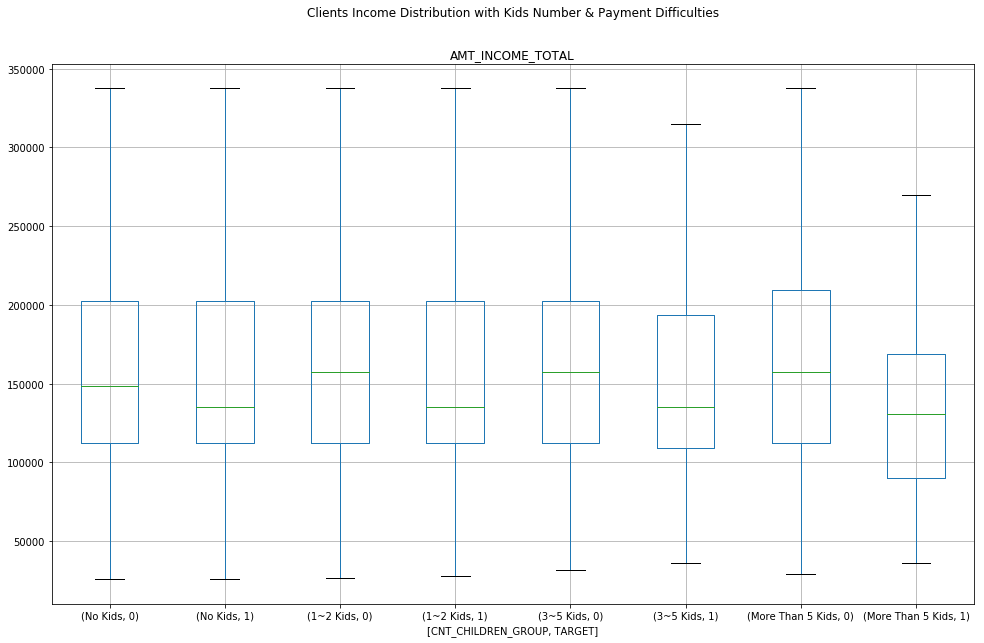

In [29]:
# Data Wrangling
grp = ['CNT_CHILDREN_GROUP', 'TARGET']
grouped_df = app_train.groupby(grp)['AMT_INCOME_TOTAL']
grouped_df.mean()

# Use boxplot to visualize
plt_column = ['AMT_INCOME_TOTAL']
plt_by = ['CNT_CHILDREN_GROUP','TARGET']
app_train.boxplot(column=plt_column, by = plt_by, showfliers = False, figsize=(16,10))
plt.suptitle('Clients Income Distribution with Kids Number & Payment Difficulties')
plt.show()

#### Group Data by "CNT_CHILDREN_GROUP", "Target" Columns and Sort by Average "AMT_INCOME_TOTAL". Calaulate "AMT_INCOME_TOTAL" by Using Z - Transform

In [30]:
app_train['AMT_INCOME_TOTAL_Z_BY_CHILDREN_GRP-TARGET'] = grouped_df.apply(lambda x: (x - x.mean()) / np.std(x) )
app_train[['AMT_INCOME_TOTAL','AMT_INCOME_TOTAL_Z_BY_CHILDREN_GRP-TARGET']].head()

AMT_INCOME_TOTAL  AMT_INCOME_TOTAL_Z_BY_CHILDREN_GRP-TARGET
0          202500.0                                   0.045955
1          270000.0                                   0.962149
2           67500.0                                  -0.958439
3          135000.0                                  -0.318243
4          121500.0                                  -0.446282